In [1]:
# from matplotlib import style
# style.use('fivethirtyeight')

# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

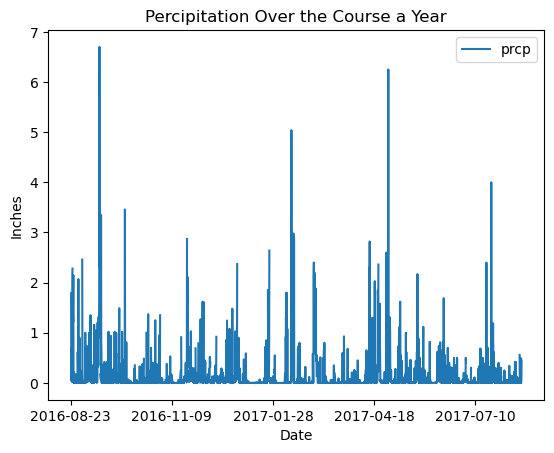

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
one_year_before = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = pd.DataFrame(precip_scores, columns=["date", "prcp"])

# Sort the dataframe by date
results = results.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
results.plot(x = "date", y = "prcp")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Percipitation Over the Course a Year')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = results["prcp"].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).distinct().count()
total_stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label("station_count")) \
                        .group_by(Measurement.station) \
                        .order_by(func.count(Measurement.station).desc()) \
                        .all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs).label("min_temp"),
                            func.max(Measurement.tobs).label("max_temp"),
                            func.avg(Measurement.tobs).label("avg_temp")) \
                        .filter(Measurement.station == 'USC00519281') \
                        .first()
most_active

(54.0, 85.0, 71.66378066378067)

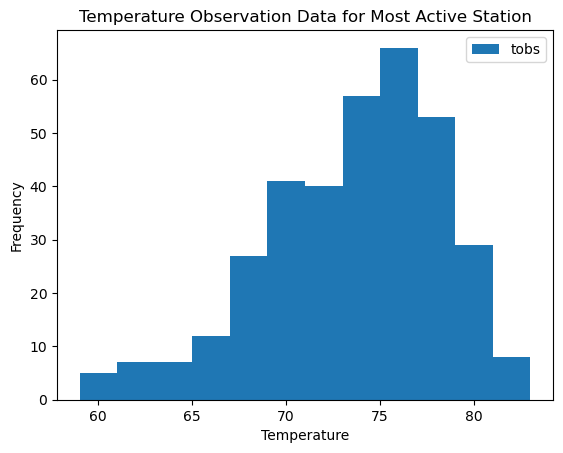

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = 'USC00519281'
prev_months = session.query(Measurement.tobs) \
                 .filter(Measurement.station == most_active_station) \
                 .filter(Measurement.date >= one_year_before) \
                 .all()
df = pd.DataFrame(prev_months, columns=["tobs"])

# Plot the results as a histogram
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data for Most Active Station')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()
